In [70]:
bart_8_256_128 = {}
bart_8_512_128 = {}
pegasus_8_256_128 = {}
t5_8_256_128 = {}
t5_8_512_128 = {}

In [71]:
bart_8_256_128['rougeL'] = 0.23999999999999996
bart_8_512_128['rougeL'] = 0.16666666666666666
pegasus_8_256_128['rougeL'] = 0.14814814814814817
t5_8_256_128['rougeL'] = 0.22222222222222224
t5_8_512_128['rougeL'] = 0.6428571428571429

In [126]:
from textblob import TextBlob
import time as time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import glob
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.graph_objs import *

In [72]:
!pip install vaderSentiment

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#https://www.kaggle.com/code/hassanamin/unsupervised-sentiment-analysis-using-vader/notebook

In [75]:
import pandas as pd

from sklearn.model_selection import train_test_split

import os

def main():
	print('Preprocessing Kaggle dataset...')
	# raw_files = [os.path.join(os.getcwd(), f'articles{i}.csv') for i in range(1, 4)]
	raw_files = [os.path.join('/content/drive/MyDrive/SpecTopSci Project', f'articles{i}.csv') for i in range(1, 4)]
	
	# Check that Kaggle files are downloaded
	for f in raw_files:
		if not os.path.isfile(f):
			raise FileNotFoundError('Missing file or did not execute script in `src/data`.')

	# Drop empty title rows
	out_df = pd.concat(pd.read_csv(f) for f in raw_files)
	out_df.drop(['Unnamed: 0'], axis=1, inplace=True)
	nrows_before = out_df.shape[0]
	out_df.dropna(subset=['title'], inplace=True)
	nrows_after = out_df.shape[0]
	print(f'Dropped {nrows_before - nrows_after} null rows.')

	# Create dataset splits 70:15:15
	train_df, val_test_df = train_test_split(out_df, test_size=0.3, random_state=0)
	val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=0)

	print(f'Train Data: {train_df.shape[0]} [{train_df.shape[0]/out_df.shape[0] * 100 :.2f}%]')
	print(train_df.head())
	print('-'*40)
	print(f'Validation Data: {val_df.shape[0]} [{val_df.shape[0]/out_df.shape[0] * 100 :.2f}%]')
	print(val_df.head())
	print('-'*40)
	print(f'Test Data: {test_df.shape[0]} [{test_df.shape[0]/out_df.shape[0] * 100 :.2f}%]')	
	print(test_df.head())
	print('-'*40)

	# Write dataset split to csv files
	train_df.to_csv(os.path.join(os.getcwd(), 'train.csv'), index=False)
	val_df.to_csv(os.path.join(os.getcwd(), 'val.csv'), index=False)
	test_df.to_csv(os.path.join(os.getcwd(), 'test.csv'), index=False)
	print('Done.')



In [76]:
if __name__ == '__main__':
	main()

Preprocessing Kaggle dataset...
Dropped 2 null rows.
Train Data: 99797 [70.00%]
           id                                              title  \
34577  131428  LaVar Ball’s ignorant nonsense hits disgusting...   
18545  181167  Intelsat to extend debt exchange on OneWeb dea...   
33659  130287  Frat bros no match for high school kids crashi...   
9281    28017  Breitbart News Saturday: Fake News, Russian Ha...   
7417    83063  Pro-choice group cries foul over Doritos comme...   

         publication                               author        date    year  \
34577  New York Post                      Mark W. Sanchez  2017-05-20  2017.0   
18545        Reuters  Liana B. Baker and Jessica DiNapoli  2017-04-20  2017.0   
33659  New York Post                          Jackie Salo  2017-05-02  2017.0   
9281       Breitbart                       Breitbart News  2017-03-17  2017.0   
7417        Fox News                       Cody Derespina  2016-02-08  2016.0   

       month            

In [77]:
news = pd.read_csv('/content/drive/MyDrive/SpecTopSci Project/T_t5_8_512_128.test')

In [78]:
news['generated_headline'] = news['generated_headline'].replace(u'\xa0',u' ', regex=True)

In [79]:
#news = pd.read_csv('test.csv')
#news['title']

In [80]:
analyser = SentimentIntensityAnalyzer()

In [81]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [83]:
def column_analyzer_scores(dataframe_column):
  start_time = time.time()  
  polarity_com = []
  polarity_pos = []
  polarity_neg = []
  for i in range(len(dataframe_column)):
    score = analyser.polarity_scores(dataframe_column[i])
    # print("{:-<40} {}".format(sentence, str(score)))
    polarity_com.append(score['compound'])
    polarity_neg.append(score['neg'])
    polarity_pos.append(score['pos'])

  end_time = time.time()
  runtime = end_time - start_time
  return polarity_com, polarity_pos, polarity_neg, runtime

In [84]:
polarity_com_og, polarity_pos_og, polarity_neg_og, runtime_og = column_analyzer_scores(news.headline)

In [85]:
polarity_com_gen, polarity_pos_gen, polarity_neg_gen, runtime_gen = column_analyzer_scores(news['generated_headline'])

In [86]:
print(f'Original runtime: {runtime_og}')
print(f'Generated runtime: {runtime_gen}')

Original runtime: 1.8279814720153809
Generated runtime: 2.6170835494995117


In [87]:
data = [[runtime_og,runtime_gen]]
runtimes = pd.DataFrame(data, columns = ['runtime_og', 'runtime_gen'])
runtimes

,runtime_og,runtime_gen
0,1.827981,2.617084


In [88]:
!nvidia-smi

Sun May 15 18:47:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [89]:
runtimes.to_csv('runtimes_tesla_t4(T_t5_8_512_128).csv')

In [90]:
news['polarity_com_og'] = polarity_com_og
news['polarity_com_gen'] = polarity_com_gen

In [91]:
news['polarity_pos_og'] = polarity_pos_og
news['polarity_pos_gen'] = polarity_pos_gen

In [92]:
news['polarity_neg_og'] = polarity_neg_og
news['polarity_neg_gen'] = polarity_neg_gen

In [93]:
cd /content/drive/MyDrive/SpecTopSci Project/polarity_csv

/content/drive/MyDrive/SpecTopSci Project/polarity_csv


In [94]:
news.to_csv('polarity_tesla_t4(T_t5_8_512_128).csv')

In [95]:
news.loc[2].generated_headline

'Feds now require classroom food standards for holiday party snacks. Here’s what they’ll get you for your Christmas gift. (Sort of.'

In [96]:
news.loc[2].headline

'New Rules May Curb Classroom Cupcakes - The New York Times'

In [97]:
analyser.polarity_scores(news.loc[2].generated_headline)

{'compound': 0.8074, 'neg': 0.0, 'neu': 0.684, 'pos': 0.316}

In [98]:
analyser.polarity_scores(news.loc[2].headline)

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [99]:
analyser.polarity_scores('Government shuts down US school holiday party crackdown')

{'compound': 0.6597, 'neg': 0.0, 'neu': 0.526, 'pos': 0.474}

In [100]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [101]:
news.polarity_com_og

0       -0.1027
1        0.0000
2        0.0000
3       -0.2960
4        0.0000
          ...  
21381    0.0000
21382    0.0000
21383    0.0000
21384    0.0000
21385   -0.1280
Name: polarity_com_og, Length: 21386, dtype: float64

In [102]:
news.polarity_com_gen

0       -0.3612
1        0.0000
2        0.8074
3       -0.3400
4        0.5994
          ...  
21381   -0.7184
21382    0.6808
21383   -0.4767
21384    0.0000
21385   -0.3182
Name: polarity_com_gen, Length: 21386, dtype: float64

In [103]:
news['diff'] = (news.polarity_com_gen - news.polarity_com_og).abs()
news['sub'] = news.polarity_com_og - news.polarity_com_gen

In [104]:
news

,id,headline,publication,author,date,year,month,url,article,generated_headline,polarity_com_og,polarity_com_gen,polarity_pos_og,polarity_pos_gen,polarity_neg_og,polarity_neg_gen,diff,sub
0,188494,"Obama exhorts Britain to stay in EU, warns on ...",Reuters,Roberta Rampton and Kylie MacLellan,2016-04-22,2016.0,4.0,http://www.reuters.com/article/us-britain-eu-o...,President Barack Obama made a bold interventi...,"Obama to British: Stay in EU, you’ll get a bad...",-0.1027,-0.3612,0.000,0.103,0.104,0.179,0.2585,0.2585
1,40045,Wikileaks: Clinton Aide Asked for ’Hollywood F...,Breitbart,Ben Kew,2016-10-11,2016.0,10.0,NaN,"In the latest Wikileaks release of 2, 050 priv...",Wikileaks: ’Hollywood Friends’ Could Ask MoveO...,0.0000,0.0000,0.000,0.000,0.000,0.000,0.0000,0.0000
2,25672,New Rules May Curb Classroom Cupcakes - The Ne...,New York Times,Bettina Elias Siegel,2016-12-14,2016.0,12.0,NaN,The season of classroom holiday parties is ...,Feds now require classroom food standards for ...,0.0000,0.8074,0.000,0.316,0.000,0.000,0.8074,-0.8074
3,130728,Cops stop 8-year-old boy driving on lap of ‘dr...,New York Post,Joshua Rhett Miller,2017-05-09,2017.0,5.0,https://web.archive.org/web/20170510000425/htt...,A Wisconsin mother allegedly caught driving dr...,Mom caught again driving drunk with young son ...,-0.2960,-0.3400,0.000,0.000,0.196,0.107,0.0440,0.0440
4,21309,Hillary Clinton Twists the Knife in Donald Tru...,New York Times,Amy Chozick,2016-08-22,2016.0,8.0,NaN,Hillary Clinton leaned into her plans to raise...,Hillary Clinton: ‘We’re Going to Tax the Wealt...,0.0000,0.5994,0.000,0.189,0.000,0.000,0.5994,-0.5994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,83324,Unrest breaks out in Salt Lake City after poli...,Fox News,NaN,2016-02-28,2016.0,2.0,https://web.archive.org/web/20160229061726/htt...,A male who authorities say was wielding a bro...,Salt Lake City Police Shot Man With Broomstick...,0.0000,-0.7184,0.000,0.000,0.000,0.250,0.7184,0.7184
21382,105502,Iran’s Moderates Appear To Have Expanded Cont...,Buzzfeed News,Borzou Daragahi,2016-02-29,2016.0,2.0,https://web.archive.org/web/20160229173941/htt...,Results of Friday’s election for parliament a...,Report: Moderates Quadruple Share of 20 House ...,0.0000,0.6808,0.000,0.301,0.000,0.000,0.6808,-0.6808
21383,146817,"It’s up to America now, says Julian Assange on...",Guardian,NaN,2017-01-29,2017.0,1.0,https://www.theguardian.com/media/2017/jan/29/...,Julian Assange has said the ball is in America...,Julian Assange says offer to go to US after Ch...,0.0000,-0.4767,0.000,0.000,0.000,0.124,0.4767,0.4767
21384,44901,Kellyanne Conway to CNN: Your Polls Were Off F...,Breitbart,Breitbart TV,2016-02-17,2016.0,2.0,NaN,"On Wednesday, Polling Company President and CE...","Conway: Some Polls ‘Overestimate, Some Underes...",0.0000,0.0000,0.000,0.000,0.000,0.000,0.0000,0.0000


In [105]:
news.publication.unique()

array(['Reuters', 'Breitbart', 'New York Times', 'New York Post',
       'Washington Post', 'National Review', 'Atlantic', 'Buzzfeed News',
       'NPR', 'Vox', 'CNN', 'Talking Points Memo', 'Fox News', 'Guardian',
       'Business Insider'], dtype=object)

In [115]:
visdata = news[['publication','diff']].groupby(by='publication').sum()
visdata['publication'] = visdata.index
visdata = visdata.reset_index(drop=True)

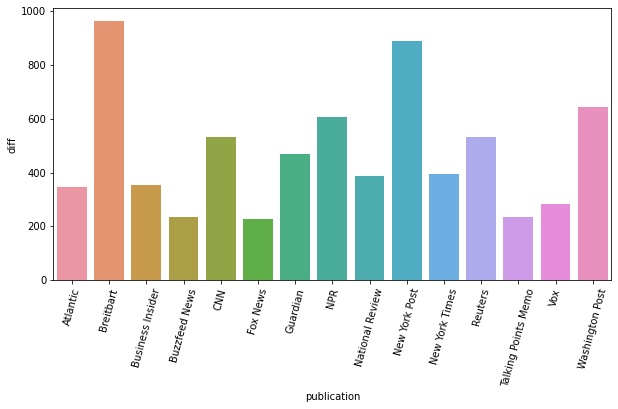

In [119]:
ax = sns.ax = sns.barplot(x="publication", y="diff", data=visdata)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)

In [122]:
visdata["radius"] =round(np.square(visdata['diff'])/10000)
visdata['x_axis'] = np.arange(0,45,3)
visdata['ones'] = 1
# np.sqrt(

In [123]:
plt.rcParams['figure.figsize'] = [10, 5]

In [124]:
fig = px.scatter(visdata, x='x_axis', y='ones',
             size='radius', 
             color='publication',
             text='publication', size_max=60)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

In [60]:
def column_analyzer_scores(dataframe_column):
  start_time = time.time()  
  polarity_com = []
  subjectivity = []
  for i in range(len(dataframe_column)):
    polarity = TextBlob(dataframe_column[i]).sentiment.polarity
    subjectivity_score = TextBlob(dataframe_column[i]).sentiment.subjectivity
    # print("{:-<40} {}".format(sentence, str(score)))
    polarity_com.append(polarity)
    subjectivity.append(subjectivity_score)

  end_time = time.time()
  runtime = end_time - start_time
  return subjectivity, polarity_com, runtime

In [61]:
subjectivity_og, polarity_com_og, runtime_og = column_analyzer_scores(news.headline)
subjectivity_gen, polarity_com_gen, runtime_gen = column_analyzer_scores(news.generated_headline)

In [62]:
news['subjectivity_og'] = subjectivity_og
news['subjectivity_gen'] = subjectivity_gen

In [66]:
news['diff_sub'] = np.abs(news['subjectivity_og'] - news['subjectivity_gen'])
news['sub_sub'] = news['subjectivity_gen'] - news['subjectivity_og']

In [67]:
visdata = news[['publication','sub_sub']].groupby(by='publication').sum()
visdata['publication'] = visdata.index
visdata = visdata.reset_index(drop=True)

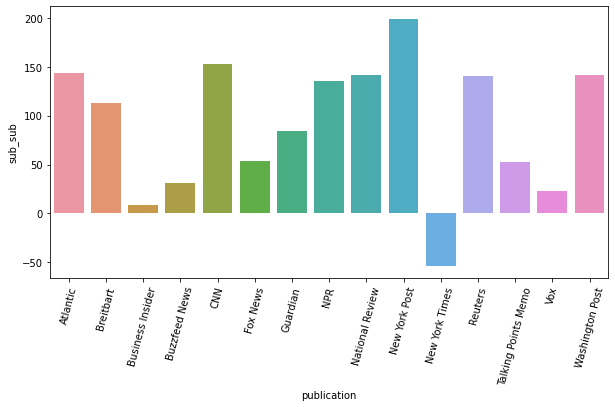

In [69]:
ax = sns.ax = sns.barplot(x="publication", y="sub_sub", data=visdata)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)

In [ ]:
visdata["radius"] =round(np.square(visdata['diff_sub'])/10000)
# keywords = visdata
visdata["radius"] =round(np.square(visdata['diff_sub'])/10000)
visdata['x_axis'] = np.arange(0,45,3)
visdata['ones'] = 1

fig = px.scatter(visdata, x='x_axis', y='ones',
             size='radius', 
             color='publication',
             text='publication', size_max=60)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

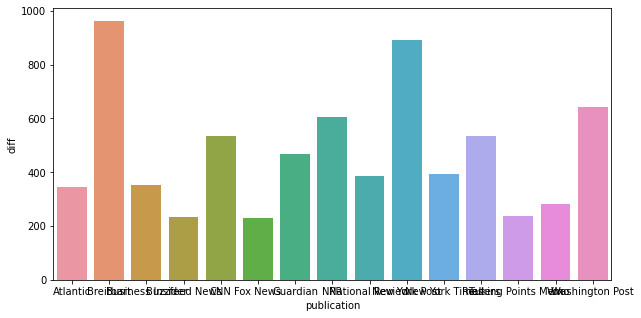

In [127]:
sns.barplot(x="publication", y="diff", data=visdata)

In [128]:
news[['publication','diff']].groupby(by='publication').sum()

,diff
publication,
Atlantic,346.5316
Breitbart,961.9279
Business Insider,352.4498
Buzzfeed News,233.3915
CNN,534.1009
Fox News,228.3034
Guardian,469.2299
NPR,605.9945
National Review,386.8876
